In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('/home/sanjana/Desktop/datasets/airbnb-recruiting-new-user-bookings/train_users_2.csv')
#df_test = pd.read_csv('/home/sanjana/Desktop/datasets/airbnb-recruiting-new-user-bookings/train_users_2.csv')
sessions = pd.read_csv('/home/sanjana/Desktop/datasets/airbnb-recruiting-new-user-bookings/sessions.csv')
#usergrp = pd.read_csv('')
#countries = pd.read_csv('')
'''
print(df_train.country_destination.unique())

print("=============")

print((df_train.country_destination == 'US').sum())
print((df_train.country_destination == 'FR').sum())
print((df_train.country_destination == 'CA').sum())
print((df_train.country_destination == 'GB').sum())
print((df_train.country_destination == 'ES').sum())
print((df_train.country_destination == 'IT').sum())
print((df_train.country_destination == 'PT').sum())
print((df_train.country_destination == 'NL').sum())
print((df_train.country_destination == 'DE').sum())
print((df_train.country_destination == 'AU').sum())

print("==============")
print(df_train['country_destination'].describe())
'''

'\nprint(df_train.country_destination.unique())\n\nprint("=============")\n\nprint((df_train.country_destination == \'US\').sum())\nprint((df_train.country_destination == \'FR\').sum())\nprint((df_train.country_destination == \'CA\').sum())\nprint((df_train.country_destination == \'GB\').sum())\nprint((df_train.country_destination == \'ES\').sum())\nprint((df_train.country_destination == \'IT\').sum())\nprint((df_train.country_destination == \'PT\').sum())\nprint((df_train.country_destination == \'NL\').sum())\nprint((df_train.country_destination == \'DE\').sum())\nprint((df_train.country_destination == \'AU\').sum())\n\nprint("==============")\nprint(df_train[\'country_destination\'].describe())\n'

In [3]:
print(sessions.info())
sessions.dropna(subset = ["user_id"], inplace=True)
sessions.isnull().sum()
sessions = sessions.drop(['action', 'action_type', 'action_detail', 'device_type'], axis = 1)
sessions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB
None


,user_id,secs_elapsed
0,d1mm9tcy42,319.0
1,d1mm9tcy42,67753.0
2,d1mm9tcy42,301.0
3,d1mm9tcy42,22141.0
4,d1mm9tcy42,435.0


In [4]:
sessions1=sessions.groupby('user_id')['secs_elapsed'].sum()

In [5]:
sessions1

user_id
00023iyk9l     867896.0
0010k6l0om     586543.0
001wyh0pz8     282965.0
0028jgx1x1     297010.0
002qnbzfs5    6487080.0
                ...    
zzxox7jnrx     639436.0
zzy7t0y9cm      73771.0
zzysuoqg6x       1731.0
zzywmcn0jv    2149949.0
zzzlylp57e     430959.0
Name: secs_elapsed, Length: 135483, dtype: float64

In [6]:
sessions = pd.DataFrame(sessions1)
user_id = list(sessions.index.values)  # this will always work in pandas
print(len(user_id))
sessions['id'] = user_id

135483


In [7]:
sessions.head()

,secs_elapsed,id
user_id,,
00023iyk9l,867896.0,00023iyk9l
0010k6l0om,586543.0,0010k6l0om
001wyh0pz8,282965.0,001wyh0pz8
0028jgx1x1,297010.0,0028jgx1x1
002qnbzfs5,6487080.0,002qnbzfs5


In [8]:
sessions.reset_index(drop=True, inplace=True)
sessions.head()

,secs_elapsed,id
0,867896.0,00023iyk9l
1,586543.0,0010k6l0om
2,282965.0,001wyh0pz8
3,297010.0,0028jgx1x1
4,6487080.0,002qnbzfs5


In [9]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [10]:
df_train = pd.merge(df_train, sessions, how='inner', on = 'id')


In [11]:
df_train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,3427529.0
1,yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,207842.0
2,4grx6yxeby,2014-01-01,20140101001639,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,1135444.0
3,ncf87guaf0,2014-01-01,20140101002146,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3755100.0
4,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB,2555.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73810,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,5141396.0
73811,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,2878924.0
73812,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,342982.0
73813,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,341609.0


In [12]:
'''
count=[62376,5023,1428,2324,2249,2835,217,762,1061,539]
cnty=['US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU']
print(count)
print(cnty)
from matplotlib import pyplot as plt
plt.title('Distribution of User preferred Destinations')
plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.bar(cnty, count)
'''

"\ncount=[62376,5023,1428,2324,2249,2835,217,762,1061,539]\ncnty=['US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL', 'DE', 'AU']\nprint(count)\nprint(cnty)\nfrom matplotlib import pyplot as plt\nplt.title('Distribution of User preferred Destinations')\nplt.xlabel('Countries')\nplt.ylabel('Bookings')\nplt.bar(cnty, count)\n"

In [13]:
df_train.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         45041
gender                         0
age                        32248
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked      302
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
secs_elapsed                   0
dtype: int64

In [14]:
print(df_train)

               id date_account_created  timestamp_first_active  \
0      d1mm9tcy42           2014-01-01          20140101000936   
1      yo8nz8bqcq           2014-01-01          20140101001558   
2      4grx6yxeby           2014-01-01          20140101001639   
3      ncf87guaf0           2014-01-01          20140101002146   
4      4rvqpxoh3h           2014-01-01          20140101002619   
...           ...                  ...                     ...   
73810  zxodksqpep           2014-06-30          20140630235636   
73811  mhewnxesx9           2014-06-30          20140630235719   
73812  6o3arsjbb4           2014-06-30          20140630235754   
73813  jh95kwisub           2014-06-30          20140630235822   
73814  nw9fwlyb5f           2014-06-30          20140630235824   

      date_first_booking     gender   age signup_method  signup_flow language  \
0             2014-01-04       MALE  62.0         basic            0       en   
1                    NaN  -unknown-   NaN    

In [15]:
df_train['first_affiliate_tracked'].value_counts()

untracked        39049
omg              18342
linked           14316
tracked-other      938
product            733
marketing          110
local ops           25
Name: first_affiliate_tracked, dtype: int64

In [16]:
df_train['first_affiliate_tracked'].fillna("untracked",inplace = True)

df_train.describe()

,timestamp_first_active,age,signup_flow,secs_elapsed
count,7.381500e+04,41567.000000,73815.000000,7.381500e+04
mean,2.014040e+13,42.414993,4.856208,1.514235e+06
std,1.711447e+08,111.201954,9.339480,1.913191e+06
min,2.014010e+13,1.000000,0.000000,0.000000e+00
25%,2.014023e+13,27.000000,0.000000,2.569205e+05
50%,2.014042e+13,32.000000,0.000000,8.728620e+05
75%,2.014053e+13,41.000000,0.000000,2.043488e+06
max,2.014063e+13,2014.000000,25.000000,3.822136e+07


In [17]:
df_train.drop(df_train[df_train['age'] > 120].index, inplace = True)
df_train.drop(df_train[df_train['age'] < 18].index, inplace = True)
df_train['age'].describe()
df_train['age'].fillna(df_train['age'].mean(),inplace = True)


df_train['date_first_booking'] = df_train['date_first_booking'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df_train['age'].fillna(df_train['age'].mean(),inplace = True)

df_train.isnull().sum()

df_train['date_first_booking'].head()
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,1,MALE,62.000000,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,3427529.0
1,yo8nz8bqcq,2014-01-01,20140101001558,0,-unknown-,36.234347,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,207842.0
2,4grx6yxeby,2014-01-01,20140101001639,0,-unknown-,36.234347,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,1135444.0
3,ncf87guaf0,2014-01-01,20140101002146,0,-unknown-,36.234347,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3755100.0
4,4rvqpxoh3h,2014-01-01,20140101002619,1,-unknown-,36.234347,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB,2555.0


In [18]:
#df_train['date_account_created']=pd.to_datetime(df_train["date_account_created"])
df_train=df_train.drop(['date_account_created'],axis=1)

In [19]:
df_train=df_train.drop(['id'],axis=1)
df_train

,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed
0,20140101000936,1,MALE,62.000000,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,3427529.0
1,20140101001558,0,-unknown-,36.234347,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,207842.0
2,20140101001639,0,-unknown-,36.234347,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,1135444.0
3,20140101002146,0,-unknown-,36.234347,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3755100.0
4,20140101002619,1,-unknown-,36.234347,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB,2555.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73810,20140630235636,0,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,5141396.0
73811,20140630235719,0,-unknown-,36.234347,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,2878924.0
73812,20140630235754,0,-unknown-,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,342982.0
73813,20140630235822,0,-unknown-,36.234347,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,341609.0


In [20]:
df_train_names=df_train
df_train_names.head()
new_train_ann= df_train[['country_destination', 'signup_method','date_first_booking', 'age','gender',
                      'language', 'secs_elapsed']].copy()
print(new_train_ann.head())

  country_destination signup_method  date_first_booking        age     gender  \
0               other         basic                   1  62.000000       MALE   
1                 NDF         basic                   0  36.234347  -unknown-   
2                 NDF         basic                   0  36.234347  -unknown-   
3                 NDF         basic                   0  36.234347  -unknown-   
4                  GB         basic                   1  36.234347  -unknown-   

  language  secs_elapsed  
0       en     3427529.0  
1       en      207842.0  
2       en     1135444.0  
3       en     3755100.0  
4       en        2555.0  


In [21]:
from sklearn.preprocessing import LabelEncoder
gender=LabelEncoder()
df_train['gender']=gender.fit_transform(df_train['gender'])
language=LabelEncoder()
df_train['language']=language.fit_transform(df_train['language'])
affiliate_channel=LabelEncoder()
df_train['affiliate_channel']=affiliate_channel.fit_transform(df_train['affiliate_channel'])
affiliate_provider=LabelEncoder()
df_train['affiliate_provider']=affiliate_provider.fit_transform(df_train['affiliate_provider'])
first_affiliate_tracked=LabelEncoder()
df_train['first_affiliate_tracked']=first_affiliate_tracked.fit_transform(df_train['first_affiliate_tracked'])
signup_app=LabelEncoder()
df_train['signup_app']=signup_app.fit_transform(df_train['signup_app'])
signup_method=LabelEncoder()
df_train['signup_method']=signup_method.fit_transform(df_train['signup_method'])
first_device_type=LabelEncoder()
df_train['first_device_type']=first_device_type.fit_transform(df_train['first_device_type'])

country_destination=LabelEncoder()
df_train['country_destination']=country_destination.fit_transform(df_train['country_destination'])

first_browser=LabelEncoder()
df_train['first_browser']=first_browser.fit_transform(df_train['first_browser'])
df_train.head(5)

,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed
0,20140101000936,1,2,62.000000,0,0,5,6,8,3,2,6,6,11,3427529.0
1,20140101001558,0,0,36.234347,0,0,5,2,4,6,2,3,10,7,207842.0
2,20140101001639,0,0,36.234347,0,0,5,5,8,3,2,6,10,7,1135444.0
3,20140101002146,0,0,36.234347,0,0,5,2,4,0,2,6,6,7,3755100.0
4,20140101002619,1,0,36.234347,0,25,5,2,4,6,3,8,0,5,2555.0


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
gender = le.fit_transform(list(df_train["gender"]))

In [23]:
col_name="country_destination"
first_col=df_train.pop(col_name)
df_train.insert(0, col_name, first_col)

In [24]:
from sklearn.model_selection import train_test_split
X = df_train.iloc[:,1:18]
Y = df_train.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)
print(x_train.columns)
print(len(x_train),len(x_test),len(y_train),len(y_test))

Index(['timestamp_first_active', 'date_first_booking', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'secs_elapsed'],
      dtype='object')
44178 29453 44178 29453


In [25]:
df_train.isnull().sum()
df_train.head()

,country_destination,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,secs_elapsed
0,11,20140101000936,1,2,62.000000,0,0,5,6,8,3,2,6,6,3427529.0
1,7,20140101001558,0,0,36.234347,0,0,5,2,4,6,2,3,10,207842.0
2,7,20140101001639,0,0,36.234347,0,0,5,5,8,3,2,6,10,1135444.0
3,7,20140101002146,0,0,36.234347,0,0,5,2,4,0,2,6,6,3755100.0
4,5,20140101002619,1,0,36.234347,0,25,5,2,4,6,3,8,0,2555.0


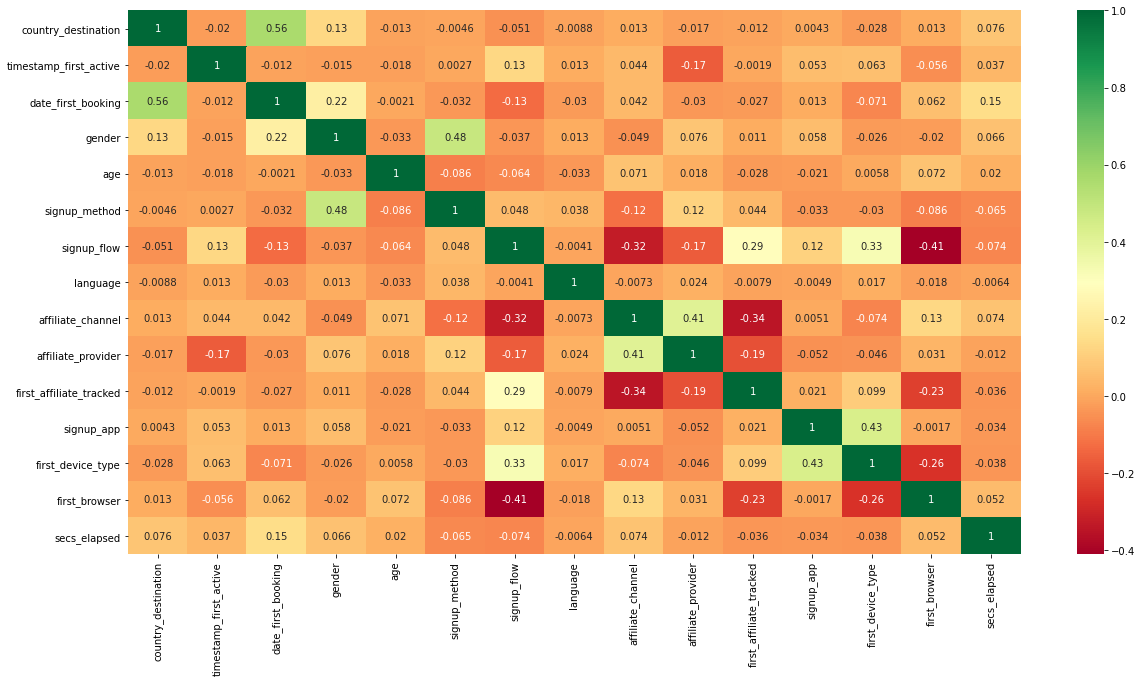

In [70]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [71]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances=x_train.columns
feat_importances.plot(kind='bar',color='olive')
plt.show()

[0.0924696  0.62316372 0.01993862 0.07595927 0.00588022 0.00439656
 0.00540426 0.01039747 0.00597833 0.0120829  0.00320881 0.01311816
 0.01984893 0.10815314]


AttributeError: 'Index' object has no attribute 'plot'

In [72]:
#print(sessions.info())

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

lm = linear_model.LogisticRegression(multi_class='multinomial',solver='saga')

lm.fit(x_train, y_train)
lm.score(x_test, y_test)
y_pred = lm.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.6112110820629477


/home/sanjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [29]:
new_train= df_train[['country_destination','date_first_booking', 'age', 'gender', 'language', 'timestamp_first_active', ]].copy()

from sklearn.model_selection import train_test_split
X2 = new_train.iloc[:,1:8]
Y2 = new_train.iloc[:,0]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.4, random_state = 0)

print(len(x_train2),len(x_test2),len(y_train2),len(y_test2))

lm2 = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm2.fit(x_train2, y_train2)
y_pred_lm = lm2.predict(x_test2)
print("Log Reg=",metrics.accuracy_score(y_test2, y_pred_lm))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(lm2, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(x_train2,y_train2)
y_pred_dt = clf2.predict(x_test2)
print("Dec Tree=",metrics.accuracy_score(y_test2, y_pred_dt))

kfold = KFold(n_splits=20, shuffle=True)
results = cross_val_score(clf2, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

44178 29453 44178 29453
Log Reg= 0.8816758904016568
Baseline: 88.29% (0.45%)
Dec Tree= 0.8793331748888059
Baseline: 88.01% (0.70%)


In [76]:
new_train.head()

,country_destination,date_first_booking,age,gender,language,secs_elapsed
0,11,1,62.000000,2,5,3427529.0
1,7,0,36.234347,0,5,207842.0
2,7,0,36.234347,0,5,1135444.0
3,7,0,36.234347,0,5,3755100.0
4,5,1,36.234347,0,5,2555.0


In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train2, y_train2)
y_pred_knn = knn.predict(x_test2)
print("KNN = ",metrics.accuracy_score(y_test2, y_pred_knn))

kfold = KFold(n_splits=20, shuffle=True)
results = cross_val_score(knn, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report    
from sklearn.metrics import accuracy_score

classifier= RandomForestClassifier(n_estimators= 250, criterion="entropy")
classifier.fit(x_train2, y_train2)
y_pred_rf= classifier.predict(x_test2)
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test2,y_pred_rf))
#print(classification_report(y_test2,y_pred_rf))
print("Random For=",accuracy_score(y_test2, y_pred_rf))
'''
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(classifier, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
'''

KNN =  0.597018979390894
Baseline: 59.37% (0.90%)
Random For= 0.8221233830170102


'\nkfold = KFold(n_splits=10, shuffle=True)\nresults = cross_val_score(classifier, x_train2, y_train2, cv=kfold)\nprint("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))\n'

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5, step=10, verbose=5)
rfe_selector.fit(x_train2, y_train2)
rfe_support = rfe_selector.get_support()
rfe_feature = x_train2.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

5 selected features
['date_first_booking', 'age', 'gender', 'language', 'secs_elapsed']


In [82]:
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()
LogReg_clf.fit(x_train2, y_train2)
DTree_clf.fit(x_train2, y_train2)
SVC_clf.fit(x_train2, y_train2)

LogReg_pred = LogReg_clf.predict(x_test2)
DTree_pred = DTree_clf.predict(x_test2)
SVC_pred = SVC_clf.predict(x_test2)

averaged_preds = (LogReg_pred + DTree_pred + SVC_pred)//3
acc = accuracy_score(y_test2, averaged_preds)
print("Avg acc=" ,acc)

voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(x_train2, y_train2)
preds = voting_clf.predict(x_test2)
acc = accuracy_score(y_test2, preds)

print("voting= " + str(acc))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(voting_clf, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Avg acc= 0.6147421315315927
voting= 0.6125012732149526


/home/sanjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Baseline: 61.08% (0.67%)


In [ ]:
SVC_clf1 = SVC(kernel='linear')
SVC_clf1.fit(x_train2, y_train2)
SVC_pred1 = SVC_clf1.predict(x_test2)

acc2 = accuracy_score(y_test2, SVC_pred1)
print(acc2)

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(SVC_clf1, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train2, y_train2)
gnb_predictions = gnb.predict(x_test2)
# accuracy on X_test
accuracy = gnb.score(x_test2, y_test2)
print("NV=",accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(x_train2,y_train2)
print("GB=",accuracy_score(y_test2, y_pred))

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(classifier, x_train2, y_train2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

NV= 0.8765151257936373
GB= 0.6112110820629477
Baseline: 88.08% (0.51%)


# test set

In [28]:
df_test = pd.read_csv('/home/sanjana/Desktop/datasets/airbnb-recruiting-new-user-bookings/test_users.csv')

df_test = pd.merge(df_test, sessions, how='inner', on = 'id')

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61668 entries, 0 to 61667
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       61668 non-null  object 
 1   date_account_created     61668 non-null  object 
 2   timestamp_first_active   61668 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   61668 non-null  object 
 5   age                      33067 non-null  float64
 6   signup_method            61668 non-null  object 
 7   signup_flow              61668 non-null  int64  
 8   language                 61668 non-null  object 
 9   affiliate_channel        61668 non-null  object 
 10  affiliate_provider       61668 non-null  object 
 11  first_affiliate_tracked  61662 non-null  object 
 12  signup_app               61668 non-null  object 
 13  first_device_type        61668 non-null  object 
 14  first_browser         

In [29]:
df_test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         61668
gender                         0
age                        28601
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        6
signup_app                     0
first_device_type              0
first_browser                  0
secs_elapsed                   0
dtype: int64

In [30]:
df_test.drop(df_test[df_test['age'] > 120].index, inplace = True)
df_test.drop(df_test[df_test['age'] < 18].index, inplace = True)
df_test['age'].describe()
df_test['age'].fillna(df_test['age'].mean(),inplace = True)


df_test['date_first_booking'] = df_test['date_first_booking'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df_test['age'].fillna(df_test['age'].mean(),inplace = True)

df_test.isnull().sum()

df_test['date_first_booking'].head()

0    0
1    0
2    0
3    0
4    0
Name: date_first_booking, dtype: int64

In [31]:
new_test.head()

NameError: name 'new_test' is not defined

In [32]:
from sklearn.preprocessing import LabelEncoder
gender=LabelEncoder()
df_test['gender']=gender.fit_transform(df_test['gender'])
language=LabelEncoder()
df_test['language']=language.fit_transform(df_test['language'])
signup_method=LabelEncoder()
df_test['signup_method']=signup_method.fit_transform(df_test['signup_method'])
df_test.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,secs_elapsed
0,5uwns89zht,2014-07-01,20140701000006,0,1,35.000000,1,0,6,direct,direct,untracked,Moweb,iPhone,Mobile Safari,119187.0
1,jtl0dijy2j,2014-07-01,20140701000051,0,0,34.831464,0,0,6,direct,direct,untracked,Moweb,iPhone,Mobile Safari,250119.0
2,xx0ulgorjt,2014-07-01,20140701000148,0,0,34.831464,0,0,6,direct,direct,linked,Web,Windows Desktop,Chrome,975575.0
3,6c6puo6ix0,2014-07-01,20140701000215,0,0,34.831464,0,0,6,direct,direct,linked,Web,Windows Desktop,IE,123001.0
4,czqhjk3yfe,2014-07-01,20140701000305,0,0,34.831464,0,0,6,direct,direct,untracked,Web,Mac Desktop,Safari,454023.0


In [33]:
new_test= df_test[['signup_method','date_first_booking', 'age','gender',
                      'language', 'secs_elapsed']].copy()
new_test

,signup_method,date_first_booking,age,gender,language,secs_elapsed
0,1,0,35.000000,1,6,119187.0
1,0,0,34.831464,0,6,250119.0
2,0,0,34.831464,0,6,975575.0
3,0,0,34.831464,0,6,123001.0
4,0,0,34.831464,0,6,454023.0
...,...,...,...,...,...,...
61663,0,0,31.000000,0,6,2534232.0
61664,0,0,34.831464,0,14,51618.0
61665,0,0,34.831464,0,4,823297.0
61666,0,0,34.831464,0,6,352068.0


In [35]:
X_TEST = new_train.iloc[:,0:17]


y_pred_sub = lm2.predict(X_TEST)

new_test['country_destination'] = y_pred_sub

ValueError: X has 6 features per sample; expecting 5

In [201]:
sub_df = pd.read_csv('/home/sanjana/Desktop/datasets/airbnb-recruiting-new-user-bookings/sample_submission_NDF.csv')
sub_df

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
...,...,...
62091,cv0na2lf5a,NDF
62092,zp8xfonng8,NDF
62093,fa6260ziny,NDF
62094,87k0fy4ugm,NDF


In [ ]:
sub_df=sub_df.drop(['Survived'], axis = 1) 
sub_df['Survived']=y_pred
print(sub_df)
sub_df.to_csv('final_sub3.csv')